<a href="https://colab.research.google.com/github/Omayer-Ahmed/Machine-Learning/blob/main/Price_Prediction_with_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving price prediction.csv to price prediction.csv


{'price prediction.csv': b'\xef\xbb\xbfDate;Starting (USD);Ending (USD)\r\n01.01.24;16800;16500\r\n01.12.23;15900;16100\r\n01.11.23;15800;15300\r\n01.10.23;16100;16200\r\n01.09.23;16300;15700\r\n01.08.23;16800;16400\r\n01.07.23;15900;16200\r\n01.06.23;15800;15500\r\n01.05.23;16150;16100\r\n01.04.23;16300;15800\r\n01.03.23;16200;16200\r\n01.02.23;16300;15700\r\n'}

In [ ]:
import pandas as pd

In [ ]:

df_excel=pd.read_csv('price prediction.csv',sep=";")


In [ ]:
df_excel.tail(5)

,Date,Starting (USD),Ending (USD)
7,01.06.23,15800,15500
8,01.05.23,16150,16100
9,01.04.23,16300,15800
10,01.03.23,16200,16200
11,01.02.23,16300,15700


In [ ]:
df_excel.isnull().sum()

Date              0
Starting (USD)    0
Ending (USD)      0
dtype: int64

In [ ]:
df_excel=df_excel.drop(columns=['Date'])

In [ ]:
df_excel

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700
5,16800,16400
6,15900,16200
7,15800,15500
8,16150,16100
9,16300,15800


In [ ]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Price Prediction')

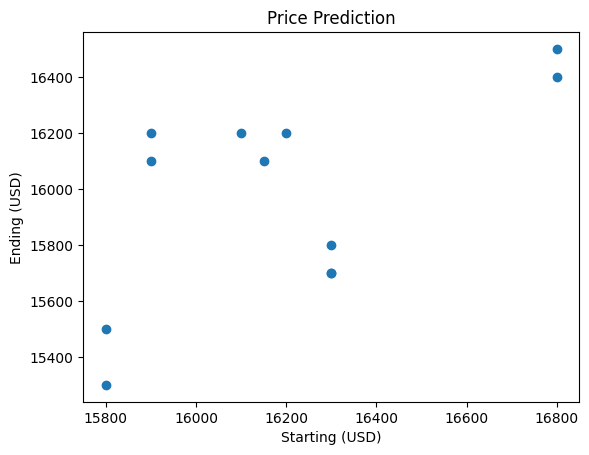

In [ ]:
plt.scatter(df_excel["Starting (USD)"],df_excel["Ending (USD)"])
plt.xlabel("Starting (USD)")
plt.ylabel("Ending (USD)")
plt.title("Price Prediction")

In [ ]:
x=df_excel[['Starting (USD)']]
x

,Starting (USD)
0,16800
1,15900
2,15800
3,16100
4,16300
5,16800
6,15900
7,15800
8,16150
9,16300


In [ ]:
y=df_excel[["Ending (USD)"]]
y

,Ending (USD)
0,16500
1,16100
2,15300
3,16200
4,15700
5,16400
6,16200
7,15500
8,16100
9,15800


#Linear Regression

In [ ]:

from sklearn.linear_model import LinearRegression

In [ ]:
#create object
reg=LinearRegression()

In [ ]:
x.mean()

Starting (USD)    16195.833333
dtype: float64

In [ ]:
y.mean()

Ending (USD)    15975.0
dtype: float64

Text(0.5, 1.0, 'Price Prediction')

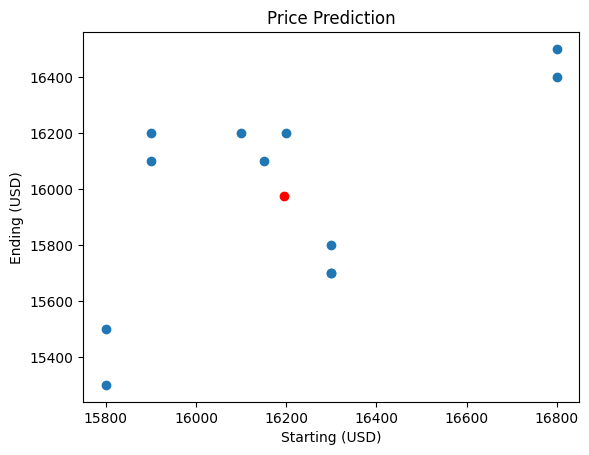

In [ ]:
plt.scatter(x.mean(),y.mean(),color="red")
plt.scatter(x,y)
plt.xlabel("Starting (USD)")
plt.ylabel("Ending (USD)")
plt.title("Price Prediction")

In [ ]:
#train the model using fit() function
reg.fit(x,y)

LinearRegression()

In [ ]:
#calculate the value of m using coef_
#m= reg.coef_
#m

In [ ]:
#calculate the intercept value c
#c = reg.intercept_
#c

In [ ]:
# y=mx + c
#y=m*16700+c
#y

In [ ]:
#using predict()
reg.predict([[16700]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16304.0105628]])

In [ ]:

df_excel['Predict_y'] = reg.predict(x)
df_excel.head()


,Starting (USD),Ending (USD),Predict_y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389


Text(0.5, 1.0, 'Price Prediction')

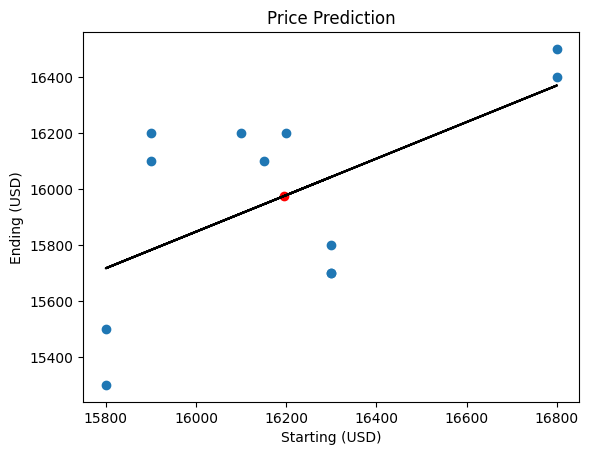

In [ ]:
plt.plot(x,reg.predict(x),color="black")
plt.scatter(x.mean(),y.mean(),color="red")
plt.scatter(x,y)
plt.xlabel("Starting (USD)")
plt.ylabel("Ending (USD)")
plt.title("Price Prediction")

# Use of Loss Function

In [ ]:
df_excel["loss"]=df_excel["Ending (USD)"]-df_excel["Predict_y"]
df_excel.head(4)

,Starting (USD),Ending (USD),Predict_y,loss
0,16800,16500,16369.268856,130.731144
1,15900,16100,15781.944215,318.055785
2,15800,15300,15716.685922,-416.685922
3,16100,16200,15912.460802,287.539198


#mse(mean square error) calculates

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(df_excel["Ending (USD)"],df_excel["Predict_y"])

80411.23397700385

#mse(mean absolute error) calculates

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(df_excel["Ending (USD)"],df_excel["Predict_y"])

260.3840017604666

#calculate the performance / accuracy using score() fucntion

In [ ]:
reg.score(x,y)

0.3577804940272571

Text(0.5, 1.0, 'Price Prediction')

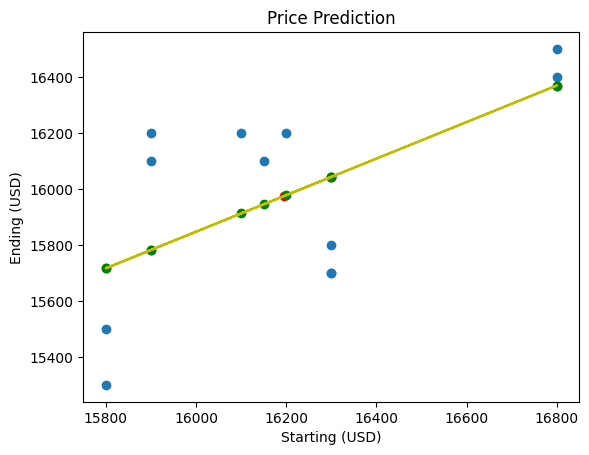

In [ ]:
plt.plot(x,reg.predict(x),color="y")
plt.scatter(x.mean(),y.mean(),color="red")
plt.scatter(x,y)
plt.scatter(df_excel["Starting (USD)"],reg.predict(x),color="g")
plt.xlabel("Starting (USD)")
plt.ylabel("Ending (USD)")
plt.title("Price Prediction")

#calculate the performance / accuracy using R squared value

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
score=r2_score(df_excel["Ending (USD)"],reg.predict(x))
score

0.3577804940272571